# 1 : housePrice

In [47]:
import os
print(os.listdir())

['.config', 'housePrice.csv', 'sample_data']


In [48]:
#importing the libraries

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libraries to help with data visualization
from matplotlib import pyplot as plt
import seaborn as sns

# to build model
from sklearn.model_selection import train_test_split
import statsmodels.api as smf
from sklearn.preprocessing import PolynomialFeatures
import random
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
#reading the file
odf = pd.read_csv('housePrice.csv')
odf.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [50]:
#shape of the data
odf.shape

(3478, 8)

In [51]:
# checking missing values in the data
odf.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [52]:
df=odf.dropna()
df.isnull().sum()

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [53]:
df.describe()

,Area,Room,Price,Price(USD)
count,3.455000e+03,3455.000000,3.455000e+03,3.455000e+03
mean,7.846707e+06,2.081331,5.380556e+09,1.793519e+05
std,3.128198e+08,0.759832,8.122829e+09,2.707610e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.420000e+09,4.733333e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.205000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


In [54]:
# Categorizing columns according to data types
categorical = df.columns[[2,3,4,5]]
to_predict = 'Price'
numeric = df.columns[[0,1,6,7]]

In [55]:
#plt.figure(figsize=(15,12))
#for i in range(1,5):
#    plt.subplot(3, 3, i)
#    plt.scatter(df['Price'], df[numeric[i-1]], s= 1)
#    plt.xlabel(to_predict)
#    plt.ylabel(numeric[i-1])

Heatmap shows a strong correlation between various independent (as assumed) variables.

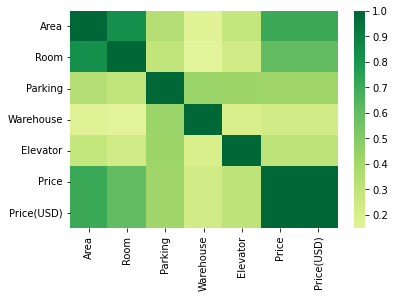

In [56]:
p = sns.heatmap(df.corr('spearman'), center=0, cmap = 'RdYlGn')

In [57]:
# Making dummy variables for categorical Columns
odfd = pd.get_dummies(data=df, columns=categorical)

In [58]:
#plt.figure(figsize=(25,12))
#p = sns.heatmap(data=odfd.corr(method='spearman'), annot=True, cmap='RdYlGn', center=0)

Function for Automatic Backward Elimination

In [59]:
# Automating backward elimination technique

def DoBackwardElimination(the_regressor, X, y, minP2eliminate):
    
    assert np.shape(X)[0] == np.shape(y)[0], 'Length of X and y do not match'
    assert minP2eliminate > 0, 'Minimum P value to eliminate cannot be zero or negative'
    
    original_list = list(range(0, np.shape(the_regressor.pvalues)[0]))
    
    max_p = 10        # Initializing with random value of maximum P value
    i = 0
    r2adjusted = []   # Will store R Square adjusted value for each loop
    r2 = []           # Will store R Square value  for each loop
    list_of_originallist = [] # Will store modified index of X at each loop
    classifiers_list = [] # fitted classifiers at each loop
    
    while max_p >= minP2eliminate:
        
        p_values = list(the_regressor.pvalues)
        r2adjusted.append(the_regressor.rsquared_adj)
        r2.append(the_regressor.rsquared)
        list_of_originallist.append(original_list)
        
        max_p = max(p_values)
        max_p_idx = p_values.index(max_p)
        
        if max_p_idx == 0:
            
            temp_p = set(p_values)
            
            # removing the largest element from temp list
            temp_p.remove(max(temp_p))
            
            max_p = max(temp_p)
            max_p_idx = p_values.index(max_p)
            
            print('Index value 0 found!! Next index value is {}'.format(max_p_idx))
            
            if max_p < minP2eliminate:
                
                print('Max P value found less than 0.1 with 0 index ...Loop Ends!!')
                
                break
                
        if max_p < minP2eliminate:
            
            print('Max P value found less than 0.1 without 0 index...Loop Ends!!')
            
            break
        
        val_at_idx = original_list[max_p_idx]
        
        idx_in_org_lst = original_list.index(val_at_idx)
        
        original_list.remove(val_at_idx)
        
        print('Popped column index out of original array is {} with P-Value {}'.format(val_at_idx, np.round(np.array(p_values)[max_p_idx], decimals= 4)))
        
        X_new = X[:, original_list]
        
        the_regressor = smf.OLS(endog = y, exog = X_new).fit()
        classifiers_list.append(the_regressor)
        
        print('==================================================================================================')
        
    return classifiers_list, r2, r2adjusted, list_of_originallist

In [60]:
# Preprocessing data

X = odfd.iloc[:,:-2].values          # Selecting all columns except last one that is 'price'.
y = odfd['Price'].values

# # Adding constant values at start of array X
X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values=X, axis=1)

In [61]:
# Scaling input data

from sklearn.preprocessing import MinMaxScaler

mscalar = MinMaxScaler()

X_minmax_scaled = mscalar.fit_transform(X)

In [62]:
# Adding constant values at start of array X
X_minmax_scaled = np.append(arr = np.ones((X_minmax_scaled.shape[0], 1)).astype(int), values=X_minmax_scaled, axis=1)

In [63]:
X_lst = list(range(0, X.shape[1]))
X_opt = X_minmax_scaled[:,X_lst]
flag = 2 # Done intentionally in order to stop popping 5th column from input array X

In [64]:
# To be used when doing manual elimination
# Eliminating columns according to P values from summary to make new X_opt
idx_to_pop = 5
if flag == 1:
    X_lst.pop(element_to_pop)
    flag = 99
    
X_opt = X_minmax_scaled[:,X_lst]

In [65]:
# Splitting data for taining and testing
X_train, X_test, y_train, y_test = train_test_split(X_opt, y, test_size=0.25, random_state=22)

In [68]:
# Fitting the regressor
regressor_SLR_OLS = smf.OLS(endog = y_train, exog = X_train).fit()

# Looking at the summary of regressor
print(regressor_SLR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.466e+07
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:55:22   Log-Likelihood:                -43499.
No. Observations:                2591   AIC:                         8.737e+04
Df Residuals:                    2407   BIC:                         8.844e+04
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.935e+08   1.99e+19  -2.99e-11      1.0

In [72]:
"""sns.set(style='ticks')
plt.figure(figsize=(14,8))
y_pred_train = regressor_SLR_OLS.predict(X_train)
y_pred_test = regressor_SLR_OLS.predict(X_test)

plt.scatter(y_train, y_train-y_pred_train, s= 2, c= 'R', alpha=0.8)
plt.scatter(y_test, y_test-y_pred_test, s= 2, c= 'B', alpha=0.8)
plt.plot([0, 180], [0,0], '-k', linewidth = 3, alpha = 0.3)
p = plt.xlim((0, 180))
p = plt.ylim((-200, 200))
p = plt.legend(['Reference Line','Training Data Residual', 'Testing Data Residual'])
p = plt.title('Residual Graph')"""

"sns.set(style='ticks')\nplt.figure(figsize=(14,8))\ny_pred_train = regressor_SLR_OLS.predict(X_train)\ny_pred_test = regressor_SLR_OLS.predict(X_test)\n\nplt.scatter(y_train, y_train-y_pred_train, s= 2, c= 'R', alpha=0.8)\nplt.scatter(y_test, y_test-y_pred_test, s= 2, c= 'B', alpha=0.8)\nplt.plot([0, 180], [0,0], '-k', linewidth = 3, alpha = 0.3)\np = plt.xlim((0, 180))\np = plt.ylim((-200, 200))\np = plt.legend(['Reference Line','Training Data Residual', 'Testing Data Residual'])\np = plt.title('Residual Graph')"

In [73]:
def Calculate_Error(original_values, predicted_values):
    assert len(original_values) == len(predicted_values), 'Both list should have same length'
    temp = 0
    error = 0
    n = len(original_values)
    for o, p in zip(original_values, predicted_values):
        temp = temp + ((o-p)**2)
        
    temp = temp/n
    error = np.sqrt(temp)
    return error

In [78]:
train_data_error = Calculate_Error(original_values=y_train, predicted_values=y_pred_train)
test_data_error = Calculate_Error(original_values=y_test, predicted_values=y_pred_test)
# Mean Squared Error (MSE)
print('MSE for training data is {}'.format(np.round(train_data_error, 4)))
print('MSE for testing data is {}'.format(np.round(test_data_error, 4)))


MSE for training data is 4731039.8238
MSE for testing data is 6018190.5094


In [91]:
"""random.seed(22)
plt.figure(figsize=(15, 10))
rand_nums1 = random.sample(range(0, len(y_train)), 50)
plt.subplot(2,1,1)
# plt.figure(figsize=(15,10))
p = plt.plot(range(0, 50), y_train[rand_nums1, ], color = 'red')
p = plt.plot(range(0, 50), y_pred_train[rand_nums1, ], color = 'blue')
plt.title(r'$ \mathrm{\mathsf{Training Data Output}}$')
plt.legend(['Original Output', 'Predicted Output'])
plt.xlabel(r'$Observation  Number \longrightarrow$')
plt.ylabel(r'$Output \longrightarrow$')
plt.ylim(-50, 250)


rand_nums2 = random.sample(range(0, len(y_test)), 50)
plt.subplot(2,1,2)
p = plt.plot(range(0, 50), y_test[rand_nums2, ], color = 'red')
p = plt.plot(range(0, 50), y_pred_test[rand_nums2, ], color = 'blue')
plt.title(r'$ \mathrm{\mathsf{Testing Data Output}}$')
plt.legend(['Original Output', 'Predicted Output'])
plt.xlabel(r'$Observation  Number \longrightarrow$')
plt.ylabel(r'$Output \longrightarrow$')
plt.ylim(-50, 250)

plt.subplots_adjust(hspace=0.4)
"""

"random.seed(22)\nplt.figure(figsize=(15, 10))\nrand_nums1 = random.sample(range(0, len(y_train)), 50)\nplt.subplot(2,1,1)\n# plt.figure(figsize=(15,10))\np = plt.plot(range(0, 50), y_train[rand_nums1, ], color = 'red')\np = plt.plot(range(0, 50), y_pred_train[rand_nums1, ], color = 'blue')\nplt.title(r'$ \\mathrm{\\mathsf{Training Data Output}}$')\nplt.legend(['Original Output', 'Predicted Output'])\nplt.xlabel(r'$Observation  Number \\longrightarrow$')\nplt.ylabel(r'$Output \\longrightarrow$')\nplt.ylim(-50, 250)\n\n\nrand_nums2 = random.sample(range(0, len(y_test)), 50)\nplt.subplot(2,1,2)\np = plt.plot(range(0, 50), y_test[rand_nums2, ], color = 'red')\np = plt.plot(range(0, 50), y_pred_test[rand_nums2, ], color = 'blue')\nplt.title(r'$ \\mathrm{\\mathsf{Testing Data Output}}$')\nplt.legend(['Original Output', 'Predicted Output'])\nplt.xlabel(r'$Observation  Number \\longrightarrow$')\nplt.ylabel(r'$Output \\longrightarrow$')\nplt.ylim(-50, 250)\n\nplt.subplots_adjust(hspace=0.4)\n

In [90]:
training_residual = []
for o, p in zip(y_train[rand_nums1, ], y_pred_train[rand_nums1, ]):
    training_residual.append(o-p)
    
testing_residual = []
for o, p in zip(y_test[rand_nums2, ], y_pred_test[rand_nums2, ]):
    testing_residual.append(o-p)

In [89]:
"""plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
# p = plt.bar(list(range(0, 50)),training_residual, align='center', width = 1, fill= False, edgecolor = 'k')
p = plt.scatter(list(range(0, 50)),training_residual)
p = plt.plot([0, 50], [0, 0], '-k')
plt.text(30,3500, 'Mean of residual is {}'.format(np.round(np.mean(training_residual), 4)))
plt.ylim(-5000, 5000)
plt.xlim(0,50)
plt.title('Training Residuals')
plt.xlabel(r'$Observation  Number \longrightarrow$')
plt.ylabel(r'$Residual \longrightarrow$')


plt.subplot(2,1,2)
# p = plt.bar(list(range(0, 50)),testing_residual, align='center', width = 1, fill= False, edgecolor = 'k')
p = plt.scatter(list(range(0, 50)),testing_residual)
p = plt.plot([0, 50], [0, 0], '-k')
plt.text(30,3500, 'Mean of residual is {}'.format(np.round(np.mean(testing_residual), 4)))
plt.ylim(-5000, 5000)
plt.xlim(0,50)
plt.title('Testing Residuals')
plt.xlabel(r'$Observation  Number \longrightarrow$')
plt.ylabel(r'$Residual \longrightarrow$')

plt.subplots_adjust(hspace= 0.4)"""

"plt.figure(figsize=(15,10))\n\nplt.subplot(2,1,1)\n# p = plt.bar(list(range(0, 50)),training_residual, align='center', width = 1, fill= False, edgecolor = 'k')\np = plt.scatter(list(range(0, 50)),training_residual)\np = plt.plot([0, 50], [0, 0], '-k')\nplt.text(30,3500, 'Mean of residual is {}'.format(np.round(np.mean(training_residual), 4)))\nplt.ylim(-5000, 5000)\nplt.xlim(0,50)\nplt.title('Training Residuals')\nplt.xlabel(r'$Observation  Number \\longrightarrow$')\nplt.ylabel(r'$Residual \\longrightarrow$')\n\n\nplt.subplot(2,1,2)\n# p = plt.bar(list(range(0, 50)),testing_residual, align='center', width = 1, fill= False, edgecolor = 'k')\np = plt.scatter(list(range(0, 50)),testing_residual)\np = plt.plot([0, 50], [0, 0], '-k')\nplt.text(30,3500, 'Mean of residual is {}'.format(np.round(np.mean(testing_residual), 4)))\nplt.ylim(-5000, 5000)\nplt.xlim(0,50)\nplt.title('Testing Residuals')\nplt.xlabel(r'$Observation  Number \\longrightarrow$')\nplt.ylabel(r'$Residual \\longrightarrow$

In [83]:
print('Mean of \'price\' for training data is {}.'.format(np.round(np.mean(y_train),4)))
print('Mean of residual of \'price\' for training data is {}.'.format(np.round(np.mean(training_residual),4)))

print('Mean of \'price\' for testing data is {}.'.format(np.round(np.mean(y_test),4)))
print('Mean of residual of \'price\' for training data is {}.'.format(np.round(np.mean(testing_residual),4)))

Mean of 'price' for training data is 5279533712.8873.
Mean of residual of 'price' for training data is -3651382.5703.
Mean of 'price' for testing data is 5683505960.6481.
Mean of residual of 'price' for training data is -2579583.4807.


In [84]:
# Now it's time to do backward elimination and check wether it improves performance of our regression model

regressor_list, r2, r2adjusted, list_of_changes = DoBackwardElimination(the_regressor=regressor_SLR_OLS, 
                                                                        X= X_train, y= y_train, minP2eliminate = 0.05)

Popped column index out of original array is 148 with P-Value 1.0
Popped column index out of original array is 129 with P-Value 1.0
Popped column index out of original array is 114 with P-Value 1.0
Popped column index out of original array is 165 with P-Value 1.0
Popped column index out of original array is 139 with P-Value 1.0
Popped column index out of original array is 15 with P-Value 1.0
Popped column index out of original array is 16 with P-Value 1.0
Popped column index out of original array is 100 with P-Value 1.0
Popped column index out of original array is 81 with P-Value 1.0
Popped column index out of original array is 149 with P-Value 1.0
Popped column index out of original array is 85 with P-Value 1.0
Popped column index out of original array is 106 with P-Value 1.0
Popped column index out of original array is 65 with P-Value 1.0
Popped column index out of original array is 54 with P-Value 1.0
Popped column index out of original array is 161 with P-Value 1.0
Popped column in

In [85]:
new_list = list_of_changes[1]
new_regressor = regressor_list[0]
print(new_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.456e+07
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:14:55   Log-Likelihood:                -43181.
No. Observations:                2591   AIC:                         8.673e+04
Df Residuals:                    2408   BIC:                         8.780e+04
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.143e+08   1.77e+19  -1.21e-11      1.0

# 2 : 50_CompList

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=15,
           forward=False,
           verbose=2,
           scoring='roc_auc',
           cv=4)

features = feature_selector.fit(np.array(train_features.fillna(0)), train_labels)

filtered_features= train_features.columns[list(features.k_feature_idx_)]
filtered_features

clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(train_features[filtered_features].fillna(0), train_labels)

train_pred = clf.predict_proba(train_features[filtered_features].fillna(0))
print('Accuracy on training set: {}'.format(roc_auc_score(train_labels, train_pred[:,1])))

test_pred = clf.predict_proba(test_features[filtered_features].fillna(0))
print('Accuracy on test set: {}'.format(roc_auc_score(test_labels, test_pred [:,1])))

![Feature-Selection-Methods-Fig01.jpg[1].webp](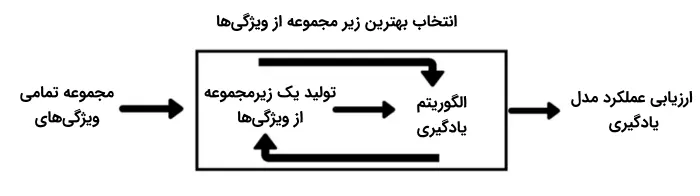)

/********************************************************************************************************************************************************************************************************************************************/

In [ ]:
import os
print(os.listdir())

['.config', '50_CompList.csv', 'sample_data']


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing datasets  
data_set= pd.read_csv('50_CompList.csv')  

In [ ]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, :-1].values  
y= data_set.iloc[:, 4].values  

In [ ]:
#Catgorical data  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
labelencoder_x= LabelEncoder()  
x[:, 3]= labelencoder_x.fit_transform(x[:,3])  

onehotencoder= OneHotEncoder()    
x= onehotencoder.fit_transform(x).toarray()  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

In [ ]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_test)    

In [ ]:
#Checking the score  : R 2 score used when calling score on a regressor uses multioutput='uniform_average'
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  
#print('y_pred Score: ', regressor.score(x_test, y_pred))  

Train Score:  1.0
Test Score:  -0.203655040607281


In [ ]:
import statsmodels.api as sm

In [ ]:
x = np.append(arr = np.ones((50,1)).astype(int), values=x, axis=1)  

In [ ]:
x_opt=x [:, [0,1,2,3,4,5]]  
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     5.670
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           0.000405
Time:                        06:47:46   Log-Likelihood:                -588.22
No. Observations:                  50   AIC:                             1188.
Df Residuals:                      44   BIC:                             1200.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.21e+05   5000.589     24.195      0.000    1.11e+05    1.31e+05
x1         -9.237e+04    2.4e+04     -3.852      0.000   -1.41e+05    -4.4e+04
x2         -8.532e+04   3.35e+04     -2.543      0.015   -1.53e+05   -1.77e+04
x3         -5.606e+04   3.35e+04     -1.671      0.102   -1.24e+05    1.15e+04
x4          -7.15e+04   3.35e+04     -2.131      0.039   -1.39e+05   -3893.387
x5         -5.123e+04   3.35e+04     -1.527      0.134   -1.19e+05    1.64e+04
==============================================================================
Omnibus:                        3.161   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                2.855
Skew:                           0.579   Prob(JB):                        0.240
Kurtosis:                       2.835   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt=x[:, [0,2,3,4,5]]  
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     2.584
Date:                Tue, 11 Oct 2022   Prob (F-statistic):             0.0496
Time:                        06:47:46   Log-Likelihood:                -595.48
No. Observations:                  50   AIC:                             1201.
Df Residuals:                      45   BIC:                             1211.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.17e+05   5592.160     20.917      0.000    1.06e+05    1.28e+05
x1          -8.13e+04   3.83e+04     -2.121      0.039   -1.59e+05   -4083.603
x2         -5.205e+04   3.83e+04     -1.358      0.181   -1.29e+05    2.52e+04
x3         -6.748e+04   3.83e+04     -1.760      0.085   -1.45e+05    9733.737
x4         -4.721e+04   3.83e+04     -1.232      0.225   -1.24e+05       3e+04
==============================================================================
Omnibus:                        1.208   Durbin-Watson:                   0.460
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                0.481
Skew:                          -0.012   Prob(JB):                        0.786
Kurtosis:                       3.480   Cond. No.                         7.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt= x[:, [0,3,4,5]]  
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     1.809
Date:                Tue, 11 Oct 2022   Prob (F-statistic):              0.159
Time:                        06:47:46   Log-Likelihood:                -597.87
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      46   BIC:                             1211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.152e+05   5738.788     20.082      0.000    1.04e+05    1.27e+05
x1         -5.032e+04   3.98e+04     -1.266      0.212    -1.3e+05    2.97e+04
x2         -6.575e+04   3.98e+04     -1.654      0.105   -1.46e+05    1.43e+04
x3         -4.548e+04   3.98e+04     -1.144      0.259   -1.26e+05    3.45e+04
==============================================================================
Omnibus:                        0.765   Durbin-Watson:                   0.190
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.209
Skew:                          -0.073   Prob(JB):                        0.901
Kurtosis:                       3.281   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt=x[:, [0,3,5]]  
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.299
Date:                Tue, 11 Oct 2022   Prob (F-statistic):              0.283
Time:                        06:47:46   Log-Likelihood:                -599.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      47   BIC:                             1210.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.139e+05   5782.556     19.693      0.000    1.02e+05    1.26e+05
x1         -4.895e+04   4.05e+04     -1.209      0.233    -1.3e+05    3.25e+04
x2         -4.411e+04   4.05e+04     -1.090      0.281   -1.26e+05    3.73e+04
==============================================================================
Omnibus:                        0.323   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.851   Jarque-Bera (JB):                0.039
Skew:                          -0.058   Prob(JB):                        0.981
Kurtosis:                       3.072   Cond. No.                         7.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_opt=x[:, [0,3]]  
regressor_OLS=sm.OLS(endog = y, exog=x_opt).fit()  
regressor_OLS.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.404
Date:                Tue, 11 Oct 2022   Prob (F-statistic):              0.242
Time:                        06:47:46   Log-Likelihood:                -599.93
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.13e+05   5734.430     19.701      0.000    1.01e+05    1.25e+05
x1         -4.805e+04   4.05e+04     -1.185      0.242    -1.3e+05    3.35e+04
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.007
Skew:                          -0.015   Prob(JB):                        0.996
Kurtosis:                       2.949   Cond. No.                         7.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/********************************************************************************************************************************************************************************************************************************************/